In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import cv2
import numpy as np
import random


In [5]:

# === PATHS TO SET ===
train_label_dir = "../traffic_data/train/labels"
val_label_dir = "../traffic_data/valid/labels"
train_image_dir = "../traffic_data/train/images"
output_dir = "./output_plots"  # Make sure this exists or create with os.makedirs

# === COLOR PALETTE ===
custom_palette = [
    "#032a4d", "#00457a", "#0458a5", "#0476df", "#50b1ff", "#88cbff", "#9e9e9e"
]

# === CLASS NAMES ===
class_names = [
'ambulance', 'army vehicle', 'auto rickshaw', 'bicycle', 'bus', 'car', 'garbagevan', 'human hauler', 'minibus', 'minivan', 'motorbike', 'pickup', 'policecar', 'rickshaw', 'scooter', 'suv', 'taxi', 'three wheelers -CNG-', 'truck', 'van', 'wheelbarrow'
]



In [6]:

# === FUNCTION TO PROCESS LABEL FILES ===
def process_labels(label_dir):
    class_counts = defaultdict(int)
    objects_per_image = []
    bbox_sizes = []

    for file in os.listdir(label_dir):
        if file.endswith(".txt"):
            with open(os.path.join(label_dir, file), "r") as f:
                lines = f.readlines()
                objects_per_image.append(len(lines))
                for line in lines:
                    parts = line.strip().split()
                    if len(parts) == 5:
                        class_id = int(parts[0])
                        width = float(parts[3])
                        height = float(parts[4])
                        class_counts[class_names[class_id]] += 1
                        bbox_sizes.append(width * height)
    return class_counts, objects_per_image, bbox_sizes

# Draw Bounding Boxes on Sample Images
def draw_bboxes(image_path, label_path, output_path):
    image = cv2.imread(image_path)
    h, w = image.shape[:2]
    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            class_id, xc, yc, bw, bh = map(float, parts)
            xmin = int((xc - bw / 2) * w)
            xmax = int((xc + bw / 2) * w)
            ymin = int((yc - bh / 2) * h)
            ymax = int((yc + bh / 2) * h)
            color = tuple(int(custom_palette[int(class_id) % len(custom_palette)].lstrip('#')[i:i+2], 16) for i in (0, 2 ,4))
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color, 2)
            cv2.putText(image, class_names[int(class_id)], (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    cv2.imwrite(output_path, image)

In [7]:
# === PROCESS TRAIN AND VAL LABELS ===
train_counts, train_objs, train_bbox = process_labels(train_label_dir)
val_counts, val_objs, val_bbox = process_labels(val_label_dir)

# === COMBINE ===
total_counts = train_counts.copy()
for k, v in val_counts.items():
    total_counts[k] += v
all_objects = train_objs + val_objs
all_bboxes = train_bbox + val_bbox

In [8]:
# === PLOTS ===
sns.set_theme(style="whitegrid")
os.makedirs(output_dir, exist_ok=True)

In [10]:
df_counts = pd.DataFrame(total_counts.items(), columns=["Class", "Count"]).sort_values("Count", ascending=False)

/var/folders/97/w7m6hrnj5lldx6gxjw172mnm0000gn/T/ipykernel_11060/2522144518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts, x="Class", y="Count", palette=custom_palette * (len(df_counts) // len(custom_palette) + 1))
/var/folders/97/w7m6hrnj5lldx6gxjw172mnm0000gn/T/ipykernel_11060/2522144518.py:3: UserWarning: The palette list has more values (28) than needed (21), which may not be intended.
  sns.barplot(data=df_counts, x="Class", y="Count", palette=custom_palette * (len(df_counts) // len(custom_palette) + 1))


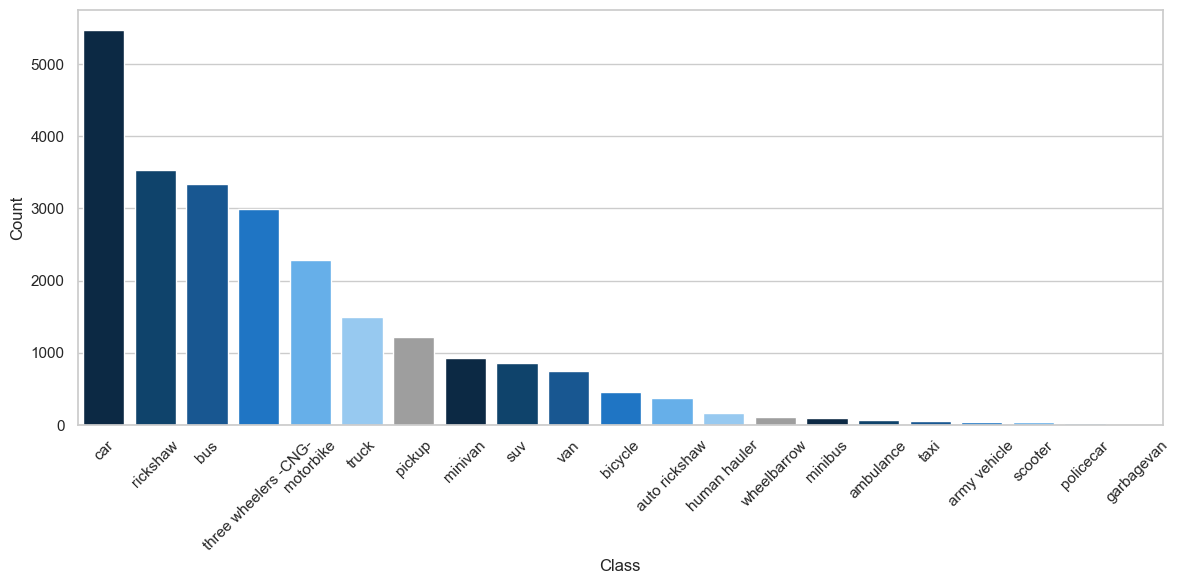

In [17]:

# Bar Plot: Class Frequency
plt.figure(figsize=(12, 6))
sns.barplot(data=df_counts, x="Class", y="Count", palette=custom_palette * (len(df_counts) // len(custom_palette) + 1))
plt.xticks(rotation=45)
#plt.title("Class Distribution (Train + Val)")
plt.tight_layout()

plt.savefig(os.path.join(output_dir, "SMALL_class_distribution.png"))
plt.close()

In [20]:
plt.figure(figsize=(12, 6))

sns.barplot(
    data=df_counts,
    x="Class",
    y="Count",
    palette=custom_palette * (len(df_counts) // len(custom_palette) + 1)
)

plt.xticks(rotation=45, ha="right", fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
# plt.title("Class Distribution (Train + Val)", fontsize=16)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "2_class_distribution.png"), dpi=300)
plt.close()


/var/folders/97/w7m6hrnj5lldx6gxjw172mnm0000gn/T/ipykernel_11060/3189396095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/97/w7m6hrnj5lldx6gxjw172mnm0000gn/T/ipykernel_11060/3189396095.py:3: UserWarning: The palette list has more values (28) than needed (21), which may not be intended.
  sns.barplot(


C:\Users\furka\AppData\Local\Temp\ipykernel_3948\200785123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts, y="Class", x="Count", palette=custom_palette * (len(df_counts) // len(custom_palette) + 1))
C:\Users\furka\AppData\Local\Temp\ipykernel_3948\200785123.py:3: UserWarning: The palette list has more values (28) than needed (21), which may not be intended.
  sns.barplot(data=df_counts, y="Class", x="Count", palette=custom_palette * (len(df_counts) // len(custom_palette) + 1))


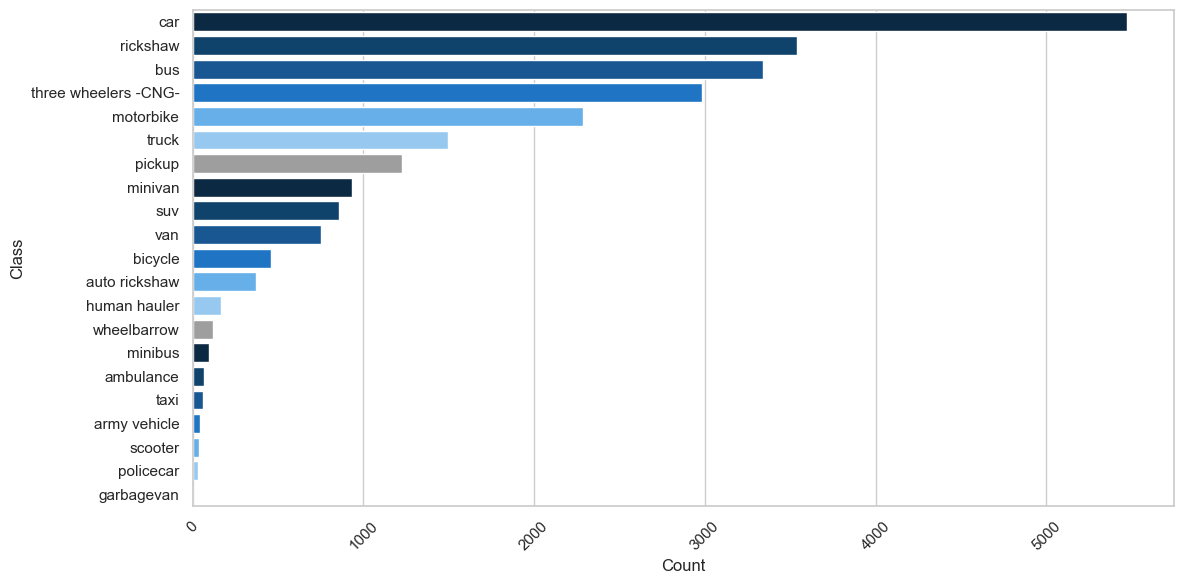

In [24]:

# Horizontal Bar Plot: Class Frequency
plt.figure(figsize=(12, 6))
sns.barplot(data=df_counts, y="Class", x="Count", palette=custom_palette * (len(df_counts) // len(custom_palette) + 1))
plt.xticks(rotation=45)
#plt.title("Class Distribution (Train + Val)")
plt.tight_layout()

plt.savefig(os.path.join(output_dir, "HOR_SMALL_class_distribution.png"))
#plt.close()

In [11]:

# Pie Chart: Top 5 Classes
top5 = df_counts.head(5)
plt.figure(figsize=(6, 6))
plt.pie(top5["Count"], labels=top5["Class"], colors=custom_palette[:5], autopct='%1.1f%%', startangle=140)
plt.tight_layout()
#plt.savefig(os.path.join(output_dir, "top5_class_pie.png"))
plt.close()


In [21]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

# Custom function for white bold text
def make_autopct(values):
    def my_autopct(pct):
        return '{:.1f}%'.format(pct)
    return my_autopct

top5 = df_counts.head(5)
plt.figure(figsize=(6, 6))

patches, texts, autotexts = plt.pie(
    top5["Count"],
    labels=top5["Class"],
    colors=custom_palette[:5],
    autopct=make_autopct(top5["Count"]),
    startangle=140
)

# Set font properties for labels (classes)
for text in texts:
    text.set_fontsize(16)        # Increase label font size
    #text.set_fontweight('bold')  # Optional: make labels bold

# Set font properties for percentage texts
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(21)       # Increase percentage font size
    autotext.set_fontweight('bold')
    autotext.set_path_effects([
        path_effects.Stroke(linewidth=1, foreground='black'),
        path_effects.Normal()
    ])

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "3_top5_class_pie.png"))
plt.close()


In [ ]:

# Histogram: Objects per Image
plt.figure(figsize=(8, 5))
sns.histplot(all_objects, bins=15, kde=True, color=custom_palette[3])
plt.title("Objects per Image")
plt.xlabel("Number of Objects")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "objects_per_image.png"))
plt.close()


In [ ]:

# Histogram: Bounding Box Size
plt.figure(figsize=(8, 5))
sns.histplot(all_bboxes, bins=20, color=custom_palette[4], kde=True)
plt.title("Bounding Box Size Distribution (Relative Area)")
plt.xlabel("Normalized Area (width × height)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "bbox_size_distribution.png"))
plt.close()


In [ ]:
# Pick and annotate 2 random training images
label_files = [f for f in os.listdir(train_label_dir) if f.endswith(".txt")]
sample_files = random.sample(label_files, 2)

for i, fname in enumerate(sample_files):
    label_path = os.path.join(train_label_dir, fname)
    image_path = os.path.join(train_image_dir, fname.replace(".txt", ".jpg"))
    output_path = os.path.join(output_dir, f"bbox_example_{i+1}.jpg")
    draw_bboxes(image_path, label_path, output_path)

In [26]:
# Bar Plot
df_counts = pd.DataFrame(total_counts.items(), columns=["Class", "Count"]).sort_values("Count", ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_counts, x="Class", y="Count", palette="magma")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("class_distribution.png")
plt.close()

C:\Users\furka\AppData\Local\Temp\ipykernel_3948\2079413006.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts, x="Class", y="Count", palette="magma")


In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# === CONFIG ===
label_dir = "../traffic_data/train/labels"  # Update with your path
image_width = 640
image_height = 360
output_path = "./bbox_heatmap.png"

# === COLOR PALETTE ===
custom_palette = [
      "#ffffff", "#88cbff", "#50b1ff", "#0476df", "#0458a5", "#00457a", "#032a4d"
]
#fcfcfd
#9e9e9e
custom_cmap = LinearSegmentedColormap.from_list("custom_blues", custom_palette)

# === Accumulate bbox centers ===
x_centers = []
y_centers = []

for fname in os.listdir(label_dir):
    if not fname.endswith(".txt"):
        continue
    with open(os.path.join(label_dir, fname), "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            _, x, y, _, _ = map(float, parts)
            x_centers.append(int(x * image_width))
            y_centers.append(int(y * image_height))

# === Create heatmap ===
heatmap, xedges, yedges = np.histogram2d(
    x_centers, y_centers,
    bins=(64, 36),
    range=[[0, image_width], [0, image_height]]
)

# === Plotting ===
plt.figure(figsize=(3.4, 2.5))  # Single-column LaTeX size
sns.set_style("white")
sns.heatmap(
    heatmap.T,
    cmap=custom_cmap,
    cbar=True,
    xticklabels=False,
    yticklabels=False
)

plt.xlabel("Image Width (px)", fontsize=12)
plt.ylabel("Image Height (px)", fontsize=12)
plt.tight_layout()
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.close()


In [26]:
import os

# === Paths ===
label_dir = "../traffic_data/train/labels"  # update as needed
image_dir = "../traffic_data/train/images"

# === Collect image and label base names (without extensions)
image_files = [f for f in os.listdir(image_dir) if f.endswith((".jpg", ".png"))]
image_basenames = set(os.path.splitext(f)[0] for f in image_files)

# === Track images with missing or empty label files
images_no_labels = []
images_empty_labels = []

for name in image_basenames:
    label_path = os.path.join(label_dir, name + ".txt")
    if not os.path.exists(label_path):
        images_no_labels.append(name)
    else:
        if os.path.getsize(label_path) == 0:
            images_empty_labels.append(name)

# === Results
total_images = len(image_basenames)
no_label_count = len(images_no_labels)
empty_label_count = len(images_empty_labels)
total_unlabeled = no_label_count + empty_label_count

print(f"Total images: {total_images}")
print(f"Images with NO label file: {no_label_count}")
print(f"Images with EMPTY label file: {empty_label_count}")
print(f"Total unlabeled images: {total_unlabeled}")

# Optional: list them
# for name in images_no_labels + images_empty_labels:
#     print(name)


Total images: 2704
Images with NO label file: 0
Images with EMPTY label file: 2
Total unlabeled images: 2
